**Nom et Prénom :**  MITCHOZOUNOU Sagbo Jean-Claude

(Ce mini-projet peut être faire seul ou en binôme)

# Mini projet :  Méthode de gradient à pas spectral
----
Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.

N.B: N'hésitez pas à diviser vos codes en plusieurs cellules quand c'est possible pour faciliter leurs lectures et éxecutions.

----
On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

**Etape 1**

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas fixe) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}; 
\quad 
\text{ pour } k\geq 1
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul du vecteur $u^{(1)}$ avec un pas initial $\rho_0$. A vous de choisir ce premier pas $\rho_0$ comme vous voulez.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Fonction J
def J(v):
    return [0.5*np.dot(v,v),v] # C'est juste une fonction prise pour pouvoir implémenter l'algo

def cost(v):
    return J(v)

**Implémentation de l'algorithme de BB1**

In [4]:
## implémenter l'algorithme BB1 

def Algo_BB1(eps,Kmax,t,u0,cost):
    

# Précalcul de U_1
    u1 = u0 + t*cost(u0)[1]
##.....................................##
    Y_1 = []
    U_k1 = u0
    U_k2 = u1
    val = 1
    l = 0

    while np.linalg.norm(val) > eps and l < Kmax:
        Y_1.append(cost(U_k2)[0])
        
        s_k1 = U_k2 - U_k1
        y_k1 = cost(U_k2)[1] -cost(U_k1)[1]
        
        t1 = (np.dot(s_k1,s_k1))/(np.dot(y_k1,s_k1))
        
        U_k1 = U_k2
        U_k = U_k2 - t1*cost(U_k2)[1]
        val = cost(U_k)[1]
        U_k2 = U_k
        l+=1
    return [U_k2,Y_1,l]
    


**Implémentation de l'algorithme de BB2**

In [5]:
## implémenter l'algorithme BB2

def Algo_BB2(eps,Kmax,t,u0,cost):
    

# Précalcul de U_1
    u1 = u0 + t*cost(u0)[1]

##...................................##

    Y_1 = []
    U_k1 = u0
    U_k2 = u1
    val = 1
    l = 0

    while np.linalg.norm(val) > eps and l < Kmax:
        Y_1.append(cost(U_k2)[0])
        
        s_k1 = U_k2 - U_k1
        y_k1 = cost(U_k2)[1] -cost(U_k1)[1]

        t2 = (np.dot(s_k1,y_k1))/(np.dot(y_k1,y_k1))
        
        U_k1 = U_k2
        U_k = U_k2 - t2*cost(U_k2)[1]
        val = cost(U_k)[1]
        U_k2 = U_k
        l+=1
    return [U_k2,Y_1,l]


----
**Etape 2**

> Effectuer les tests de validation pour les fonctions quadratiques suivantes ($N=10$): 

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$


In [6]:
# Définition des fonction J1 et J2 avec calcul de leur gradient
def J1 (v): # retourne la valeur de la fonction et de sont gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    I = np.arange(1,N+1,1)
    return [np.dot(v-I, v-I),2*(v-I)]

def costJ1(v):
    return J1(v)

def costJ2(v):
    return J2(v)


In [7]:
# N=40 ; #nombre de variables d'optimisation (ou dimension du probleme)
eps = 1.e-7; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations
uo = [1,1,1]

$Test \ de \ validation \ de \ BB1 \ pour \ J1 \ et \ J2 $

In [8]:
N = 10
t = 0.1
u0 = np.zeros(N)
j1b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ1)[0]
j2b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ2)[0]

print(f"Validaion pour J1{j1b1} et celle pour J2{j2b1}")


Validaion pour J1[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] et celle pour J2[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


$Test \ de \ validation \ de \ BB2 \ pour \ J1 \ et \ J2 $

In [9]:
j1b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ1)[0]
j2b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ2)[0]

print(f"Validaion pour J1{j1b2} et celle pour J2{j2b2}")

Validaion pour J1[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] et celle pour J2[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


----
**Etape 3**

On considère les fonctions suivantes (en dimension $N$): 

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$ et la fonction de Rosenbrock 

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 (pour $N=10, 20, 40$), et comparer les performances de ces deux variantes en traçant sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

In [55]:
## JR Rosenbrock
def JR_old_ (v):
    N = len (v)
    J_r = 0
    for i in range(N-1):
        J_r += (v[i+1]-v[i]**2)**2 + (v[i]-1)**2

    Grad_J = [-4*v[0]*(v[1]-v[0]**2) + 2*(v[0]-1)]
    for j in range(1,N-1):
        Grad_J.append(-4*v[j]*(v[j+1]-v[j]**2) + 2*(2*v[j]-v[j-1]-1))
   
    Grad_J.append(2*(v[N-1]-v[N-2]**2))
  
    return [J_r,np.array(Grad_J)]

def JR (v):
    N = len (v)
    w1, w2,ones = v[:-1] , v[1:], np.ones(N-1)
    dw1 = w2 - w1*w1
    dw2 = w1 - ones
    diff1 = np.zeros(N)
    diff1[1: ]  = 2*dw1
    diff1[:-1] -= 4*w1*dw1
    diff2 = np.zeros(N)
    diff2[:-1] = 2*dw2
    return np.dot(dw1,dw1) + np.dot(dw2,dw2) , diff1 + diff2


def J5(v):
    N = len(v)
    A = np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)+ 2*np.eye(N)
    f = np.ones(N)
    return [0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + np.dot(v,v), np.dot(A,v) - f + [2*l for l in v]]

def J6(v):
    N = len(v)
    A = np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)+ 2*np.eye(N)
    f = np.ones(N)
    return [0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + np.dot(v,v)**2, np.dot(A,v) - f + [4*l**3 for l in v]]

def costJ5(v):
    return J5(v)

def costJ6(v):
    return J6(v)

def costJR(v):
    return JR(v)

$Minimisation \ de \ J_5 \ J_6 \ J_R \ par \ BB1 \ pour \ N = 10,20,40$


In [56]:
M = [10,20,40]
t = 0.1

for N in M:
    u0 = np.zeros(N)
    j5b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ5)
    j6b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ6)
    jRb1 = Algo_BB1(1.e-7,Kmax,t,u0,costJR)
    print(f"Pour N = {N} les solution de J5,J6 et JR sont respectivement: \n U5={j5b1[0]}, \n\n U6={j6b1[0]} et \n\n UR={jRb1[0]}")
    print("\n")


Pour N = 10 les solution de J5,J6 et JR sont respectivement: 
 U5=[0.21132458 0.15470172 0.16986855 0.16582406 0.1668352  0.1668352
 0.16582406 0.16986855 0.15470172 0.21132458], 

 U6=[0.33123223 0.19217126 0.25603786 0.22861435 0.23893976 0.23893976
 0.22861435 0.25603786 0.19217126 0.33123223] et 

 UR=[1.         1.         1.         1.         1.         1.
 0.99999999 0.99999997 0.99999992 0.99999979]


Pour N = 20 les solution de J5,J6 et JR sont respectivement: 
 U5=[0.21132486 0.15470054 0.16987298 0.16580754 0.16689687 0.16660499
 0.16668319 0.16666225 0.16666783 0.16666644 0.16666644 0.16666783
 0.16666225 0.16668319 0.16660499 0.16689687 0.16580754 0.16987298
 0.15470054 0.21132486], 

 U6=[0.33128184 0.19200669 0.25639029 0.22779645 0.24073427 0.23492988
 0.23754094 0.23637457 0.23688216 0.23669226 0.23669226 0.23688216
 0.23637457 0.23754094 0.23492988 0.24073427 0.22779645 0.25639029
 0.19200669 0.33128184] et 

 UR=[1.         1.         1.         1.         1.       

$Minimisation \ de \ J_5 \ J_6 \ J_R \ par \ BB2 \ pour \ N = 10,20,40$
 

In [57]:
M = [10,20,40]
t = 0.1

for N in M:
    u0 = np.zeros(N)
    j5b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ5)
    j6b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ6)
    jRb2 = Algo_BB2(1.e-7,Kmax,t,u0,costJR)
    print(f"Pour N = {N} les solution de J5,J6 et JR sont respectivement: \n U5={j5b2[0]}, \n\n U6={j6b2[0]}et \n\n UR={jRb2[0]}")
    print("\n")


Pour N = 10 les solution de J5,J6 et JR sont respectivement: 
 U5=[0.21132457 0.15470172 0.16986855 0.16582407 0.16683519 0.16683519
 0.16582407 0.16986855 0.15470172 0.21132457], 

 U6=[0.33123222 0.19217127 0.25603788 0.22861435 0.23893975 0.23893975
 0.22861435 0.25603788 0.19217127 0.33123222]et 

 UR=[1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999996]


Pour N = 20 les solution de J5,J6 et JR sont respectivement: 
 U5=[0.21132486 0.15470054 0.16987298 0.16580754 0.16689687 0.16660499
 0.16668319 0.16666225 0.16666783 0.16666644 0.16666644 0.16666783
 0.16666225 0.16668319 0.16660499 0.16689687 0.16580754 0.16987298
 0.15470054 0.21132486], 

 U6=[0.33128184 0.19200668 0.2563903  0.22779644 0.24073429 0.23492987
 0.23754095 0.23637456 0.23688217 0.23669226 0.23669226 0.23688217
 0.23637456 0.23754095 0.23492987 0.24073429 0.22779644 0.2563903
 0.19200668 0.33128184]et 

 UR=[1.         1.         1.         1.         1.         

**Comparaison des performances des deux variantes BB1 et BB2 pour N = 40.**


In [58]:
N = 20
u0 = np.zeros(N)
J5b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ5)
J6b1 = Algo_BB1(1.e-7,Kmax,t,u0,costJ6)
JRb1 = Algo_BB1(1.e-7,Kmax,t,u0,costJR)
J5b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ5)
J6b2 = Algo_BB2(1.e-7,Kmax,t,u0,costJ6)
JRb2 = Algo_BB2(1.e-7,Kmax,t,u0,costJR)

Nombre d'tération pour BB1: k=14 
Nombre d'tération pour BB2: k=14 


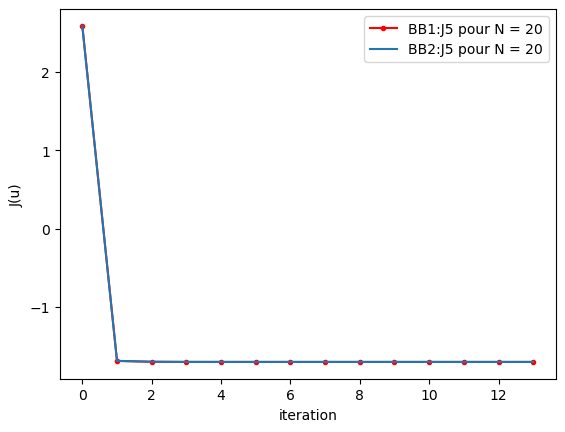

In [65]:
#Performance de BB1 et BB2 sur la fonction J5  
print(f"Nombre d'tération pour BB1: k={J5b1[2]} ")
print(f"Nombre d'tération pour BB2: k={J5b2[2]} ")
   
plt.figure()
plt.plot(np.arange(J5b1[2]),J5b1[1],'r.-',label = f'BB1:J5 pour N = {N}')
plt.plot(np.arange(J5b2[2]),J5b2[1], label = f'BB2:J5 pour N = {N}')
plt.xlabel("iteration")
plt.ylabel("J(u)")
plt.legend()


Nombre d'tération pour BB1: k=22 
Nombre d'tération pour BB2: k=23 


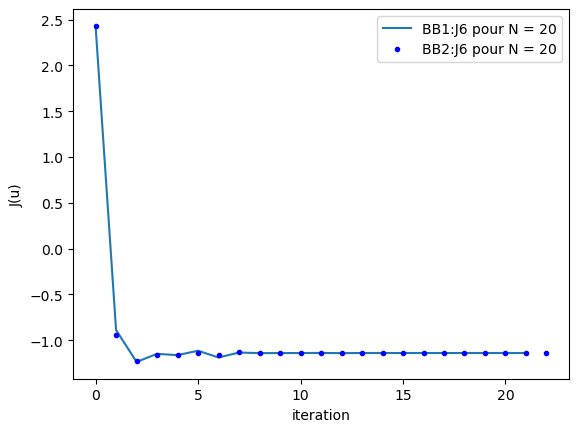

In [66]:
#Performance de BB1 et BB2 sur la fonction J6  
print(f"Nombre d'tération pour BB1: k={J6b1[2]} ")
print(f"Nombre d'tération pour BB2: k={J6b2[2]} ")

plt.figure
plt.plot(np.arange(J6b1[2]),J6b1[1], label = f'BB1:J6 pour N = {N}')
plt.plot(np.arange(J6b2[2]),J6b2[1],'b.', label = f'BB2:J6 pour N = {N}')
plt.xlabel("iteration")
plt.ylabel("J(u)")
plt.legend()

Nombre d'tération pour BB1: k=71 
Nombre d'tération pour BB2: k=56 


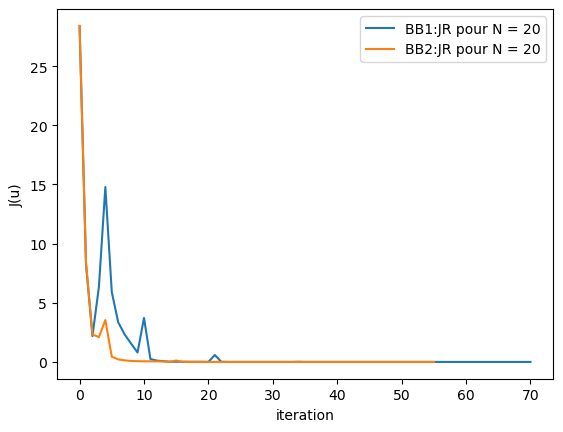

In [67]:
#Performance de BB1 et BB2 sur la fonction de Rosenbrock JR  
print(f"Nombre d'tération pour BB1: k={JRb1[2]} ")
print(f"Nombre d'tération pour BB2: k={JRb2[2]} ")

plt.figure
plt.plot(np.arange(JRb1[2]),JRb1[1], label = f'BB1:JR pour N = {N}')
plt.plot(np.arange(JRb2[2]),JRb2[1], label = f'BB2:JR pour N = {N}')
plt.xlabel("iteration")
plt.ylabel("J(u)")
plt.legend()

# Commentaires sur les performances des variantes BB1 et BB2

> Après analyse des différentes courbes, on conlut que pour un vecteur de taille 20,les deux variantes ont une performances presque équivalentes sur les fonction $J_5$ et $J_6$. Néanmoins sur la fonction de Rosenbrock $J_R$ la variante BB1 est moins performante  que la variante BB2 car l'argmin est atteint en plus de 70 itérations par BB1 contrairement à BB2 qui l'atteint en moins de 60 itérations.

**Etape 4**

> Comparer pour la fonction $J_R$ les performances des méthodes BB1 (ou BB2) et de l'algorithme NLCG (Fletcher-Reeves à pas constant) développé en TP2 : Comme avant, cette comparaison doit être faite en traçant les courbes de $J(u^{(k)})$ en fonction des itérations $k$ pour les différents algorithmes. 

> Refaire la même chose pour la fonction $J_H$ (du TP1).

On rappelle que $J_H$ est donnée par $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.

**Implémentation de l'algorithme de NLGC**

In [68]:
## Implémenter l'algorithme 
def Algo_NLGC(eps,Kmax,t,u0,cost):
    
    uk = u0
    a = 1
    j = 0
    dk = cost(u0)[1]
    y = []
    while a > eps:
        y.append(cost(uk)[0])
        Gk1 = cost(uk)[1]
        uk = uk - t*dk
        Gk = cost(uk)[1]
        ck =  np.dot(Gk,Gk)/np.dot(Gk1,Gk1)
        dk = cost(uk)[1] + ck*dk
        a = np.linalg.norm(dk)
        j+=1
    return [uk,y,j]



**Test de validation de NLGC pour JR**

In [99]:
#n = 10
#u0 = np.ones(n)
#t = 0.1
#nlgc = Algo_NLGC(1.e-7,Kmax,t,u0,costJR)
#print(f"Validaion pour JR: {nlgc[0]}")

**Comparons pour la fonction $J_R$ les performances des méthodes BB2 et de l'algorithme NLCG (Fletcher-Reeves à pas constant).**

Nombre d'tération pour NLGC: k=82 
Nombre d'tération pour BB2: k=62 


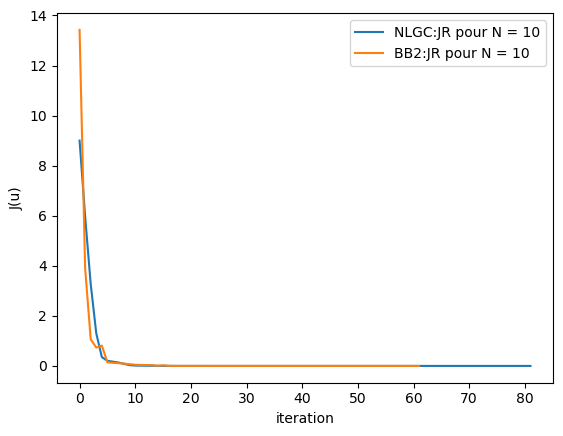

In [95]:
N = 10
t = 0.1
u0 = np.zeros(N)
JRb2 = Algo_BB2(1.e-7,Kmax,t,u0,costJR)
NLGC = Algo_NLGC(1.e-7,Kmax,t,u0,costJR)
print(f"Nombre d'tération pour NLGC: k={NLGC[2]} ")
print(f"Nombre d'tération pour BB2: k={JRb2[2]} ")

plt.figure()
plt.plot(np.arange(NLGC[2]),NLGC[1], label = f'NLGC:JR pour N = {N}')
plt.plot(np.arange(JRb2[2]),JRb2[1], label = f'BB2:JR pour N = {N}')
plt.xlabel("iteration")
plt.ylabel("J(u)")
plt.legend()

# Commentaire sur les performances de BB2 et NLGC sur $J_R$.

> Après analyse des différentes courbes, on conlut que pour un vecteur de taille 10, sur la fonction de Rosenbrock  $J_R$  la méthode BB2 est moins performante   que la méthode NLGC    car l'argmin est atteint en plus de 50 itérations par BB2 contrairement à NLGC qui l'atteint en moins de 20 itérations.

**Faisons la même chose pour la fonction $J_H$.**
>  $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$

In [96]:
def JH(u):
    J = (u[0]**2 +u[1]-2)**2 + (u[1]**2-2*u[0]+1)**2
    Grad = [4*u[0]*(u[0]**2 +u[1]-2)-4*(u[1]**2-2*u[0]+1), 2*(u[0]**2 +u[1]-2)+4*u[1]*(u[1]**2-2*u[0]+1)**2]
    return [J, np.array(Grad)]
JH([0,0])

[5, array([-4, -4])]

In [97]:
def costJH(v):
    return JH(v)

Nombre d'tération pour NLGC: k=24 
Nombre d'tération pour BB2: k=36 


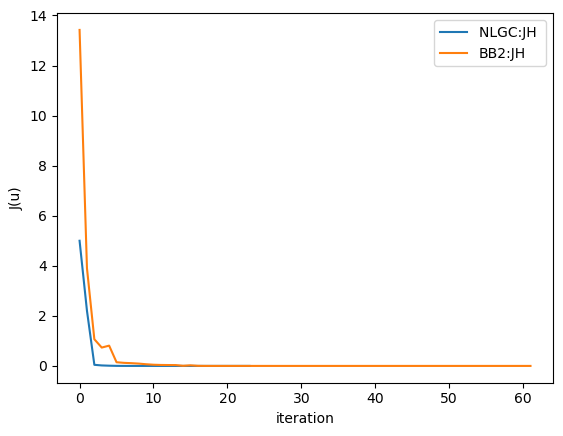

In [101]:
u0 = np.array([0,0])
JHb2 = Algo_BB2(1.e-7,Kmax,t,u0,costJH)
NLGC = Algo_NLGC(1.e-7,Kmax,t,u0,costJH)
print(f"Nombre d'tération pour NLGC: k={NLGC[2]} ")
print(f"Nombre d'tération pour BB2: k={JHb2[2]} ")
plt.figure
plt.plot(np.arange(NLGC[2]),NLGC[1], label = f'NLGC:JH ')
plt.plot(np.arange(JRb2[2]),JRb2[1], label = f'BB2:JH')
plt.xlabel("iteration")
plt.ylabel("J(u)")
plt.legend()

# Commentaire sur les performances de BB2 et NLGC sur $J_H$.

> Après analyse des différentes courbes, on conlut que sur la fonction de Rosenbrock  $J_R$  la méthode BB2 est moins performante   que la méthode NLGC    car l'argmin est atteint en 36 itérations par BB2 contrairement à NLGC qui l'atteint en moins de 24 itérations.